In [87]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Iris Flower Dataset
from sklearn.datasets import load_iris
flower = load_iris()

In [40]:
dir(flower)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [41]:
print(len(flower.data))

150


In [52]:
flower.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:
flower_df = pd.DataFrame(flower.data,columns=flower.feature_names)
flower_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
target_df = pd.DataFrame({"Flower Code":flower.target})
target_df.head()

,Flower Code
0,0
1,0
2,0
3,0
4,0


In [53]:
target_df["Flower Name"] = target_df["Flower Code"].apply(lambda x: flower.target_names[x])
target_df.head()

,Flower Code,Flower Name
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa


In [49]:
combined_df = pd.concat([flower_df,target_df],axis="columns")
combined_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower Code,Flower Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [50]:
# Exporting to CSV file for data exploration
combined_df.to_csv("flower-dataset.csv",index=False)

In [57]:
# Flower Setosa
flower_setosa = combined_df[combined_df["Flower Code"]==0]
flower_setosa.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower Code,Flower Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [55]:
# Flower Versicolor
flower_versicolor = combined_df[combined_df["Flower Code"]==1]
flower_versicolor.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower Code,Flower Name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [58]:
# Flower Virginica
flower_virginica = combined_df[combined_df["Flower Code"]==2]
flower_virginica.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower Code,Flower Name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [59]:
# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

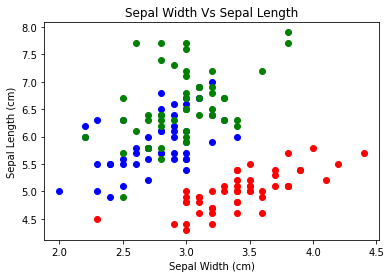

In [62]:
# Scatter Plot : Sepal Width vs Sepal Length
plt.scatter(flower_setosa["sepal width (cm)"],flower_setosa["sepal length (cm)"],color="red")
plt.scatter(flower_versicolor["sepal width (cm)"],flower_versicolor["sepal length (cm)"],color="blue")
plt.scatter(flower_virginica["sepal width (cm)"],flower_virginica["sepal length (cm)"],color="green")
plt.title("Sepal Width Vs Sepal Length")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Sepal Length (cm)")
plt.show()

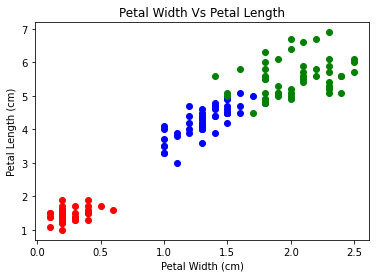

In [63]:
# Scatter Plot : Petal Width vs Petal Length
plt.scatter(flower_setosa["petal width (cm)"],flower_setosa["petal length (cm)"],color="red")
plt.scatter(flower_versicolor["petal width (cm)"],flower_versicolor["petal length (cm)"],color="blue")
plt.scatter(flower_virginica["petal width (cm)"],flower_virginica["petal length (cm)"],color="green")
plt.title("Petal Width Vs Petal Length")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Petal Length (cm)")
plt.show()

In [65]:
# Data Prep
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(flower_df,target_df["Flower Code"],test_size=0.2)

In [74]:
X_train.shape

(120, 4)

In [75]:
X_test.shape

(30, 4)

In [76]:
y_train.shape

(120,)

In [77]:
y_test.shape

(30,)

In [78]:
# Creating Model Object
from sklearn.svm import SVC

flower_model = SVC()

In [79]:
# Training Model
flower_model.fit(X_train,y_train)

SVC()

In [81]:
# Model Score
print("ModeL Score : {:.4f}".format(flower_model.score(X_test,y_test)))

ModeL Score : 0.9667


In [82]:
# Model Test
predicted_flower = flower_model.predict(X_test)
predicted_flower

array([1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 0,
       2, 2, 2, 0, 2, 1, 1, 2])

In [89]:
# Results
result = X_test
result["Actual Flower"] = y_test
result["Predicted Flower"] = predicted_flower
result.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Actual Flower,Predicted Flower
70,5.9,3.2,4.8,1.8,1,1
36,5.5,3.5,1.3,0.2,0,0
32,5.2,4.1,1.5,0.1,0,0
66,5.6,3.0,4.5,1.5,1,1
116,6.5,3.0,5.5,1.8,2,2


In [90]:
# Exporting results to csv file
result.to_csv("results.csv",index=False)